# Contents
[Read-write-display a data frame](#Read-write-display-a-data-frame)
- pd.read_csv()
- df.head()
- df.tail()
- pd.options.display.max_rows = 10
- df.loc
- df.iloc
- pd.DataFrame({'col1':[1,2,3], 'col2':[1,2,3]})
- set_index
- rename_axis

[Basic data frame summary](#Basic-data-frame-summary)
- df.shape
- df.columns
- df.dropna(axis=0)
- df.describe()
- df.count()
- df.apply()

[Data Frame vs. Series](#Data-Frame-vs.-Series)
- pd.DataFrame()
- pd.Series()
- pd.date_range()

[Groupby](#Groupby)
- MultiIndex 
[Reference](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html)
- hist()
- plot.bar()
[Reference](https://www.kaggle.com/learn-forum/60581)

[Merge](#Merge)

[Misc](#Misc)
- \[index for index in aa if aa>1\]
- a=\{x: function(x) for x in range\}, min(a,key=a.get)
- plot label rotation
[Reference](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib)
- datatime
-  scikit-learn library 
   - from sklearn.tree import DecisionTreeRegressor
   - model = DecisionTreeRegressor(random_state=1) 
   - model.fit(x,y)
   - model.predict(xxx)
   - from sklearn.metrics import mean_absolute_error
   - from sklearn.model_selection import train_test_split
- print format
   - print("blah: %d" %dataname)
   - print("blah: {:,.0f}".format(dataname))

# Read write display a data frame
[Return to Contents](#Contents)

In [1]:
# if you don't have pandas installed, run 'pip install pandas' in terminal
import pandas as pd    

In [25]:
### wrong ####
df = pd.read_table('exam0203.txt', delimiter="\t")
df.head()

,Name Sex Age Height Weight
0,Alice F 13 56.5 84.0
1,Becka F 13 65.3 98.0
2,Gail F 14 64.3 90.0
3,Karen F 12 56.3 77.0
4,Kathy F 12 59.8 84.5


In [204]:
### correct ###
# If there is no header in the txt file, use commented line
# 'df = pd.read_table('exam0203.txt', delim_whitespace=True, header=None)'
df = pd.read_table('exam0203.txt', delim_whitespace=True)

In [205]:
df #display everything

,Name,Sex,Age,Height,Weight
0,Alice,F,13,56.5,84.0
1,Becka,F,13,65.3,98.0
2,Gail,F,14,64.3,90.0
3,Karen,F,12,56.3,77.0
4,Kathy,F,12,59.8,84.5
...,...,...,...,...,...
14,John,M,12,59.0,99.5
15,Philip,M,16,72.0,150.0
16,Robert,M,12,64.8,128.0
17,Thomas,M,11,57.5,85.0


In [206]:
df.head()  #display the first five rows, () is needed since this is a method not attribute

,Name,Sex,Age,Height,Weight
0,Alice,F,13,56.5,84.0
1,Becka,F,13,65.3,98.0
2,Gail,F,14,64.3,90.0
3,Karen,F,12,56.3,77.0
4,Kathy,F,12,59.8,84.5


In [33]:
df.head(3)  #display the first three rows

,Name,Sex,Age,Height,Weight
0,Alice,F,13,56.5,84.0
1,Becka,F,13,65.3,98.0
2,Gail,F,14,64.3,90.0


`df.head()` works similarly as `df.tail()`

In [116]:
df.tail()

,Name,Sex,Age,Height,Weight
15th,John,M,12,59.0,99.5
16th,Philip,M,16,72.0,150.0
17th,Robert,M,12,64.8,128.0
18th,Thomas,M,11,57.5,85.0
19th,William,M,15,66.5,112.0


To test the differences between `loc` and `iloc`, we first change the index name

In [207]:
df.index = ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',\
           '11st','12nd','13rd','14th','15th','16th','17th','18th','19th']

In [208]:
df

,Name,Sex,Age,Height,Weight
1st,Alice,F,13,56.5,84.0
2nd,Becka,F,13,65.3,98.0
3rd,Gail,F,14,64.3,90.0
4th,Karen,F,12,56.3,77.0
5th,Kathy,F,12,59.8,84.5
...,...,...,...,...,...
15th,John,M,12,59.0,99.5
16th,Philip,M,16,72.0,150.0
17th,Robert,M,12,64.8,128.0
18th,Thomas,M,11,57.5,85.0


In [39]:
df.loc['1st']   #display a certain row using index name

Name      Alice
Sex           F
Age          13
Height     56.5
Weight       84
Name: 1st, dtype: object

In [42]:
df.iloc[0]      #display a certain row using index

Name      Alice
Sex           F
Age          13
Height     56.5
Weight       84
Name: 1st, dtype: object

In [49]:
pd.options.display.max_rows = 10   #display setting
df

,Name,Sex,Age,Height,Weight
1st,Alice,F,13,56.5,84.0
2nd,Becka,F,13,65.3,98.0
3rd,Gail,F,14,64.3,90.0
4th,Karen,F,12,56.3,77.0
5th,Kathy,F,12,59.8,84.5
...,...,...,...,...,...
15th,John,M,12,59.0,99.5
16th,Philip,M,16,72.0,150.0
17th,Robert,M,12,64.8,128.0
18th,Thomas,M,11,57.5,85.0


If you want to manually create a data frame, here is the way:

In [46]:
df_man = pd.DataFrame({'col1':[1,2,3], 'col2':[1,2,3]})
df_man

,col1,col2
0,1,1
1,2,2
2,3,3


You can also directly change the index name when creating the data frame manually

In [45]:
df_man = pd.DataFrame({'col1':[1,2,3], 'col2':[1,2,3]}, index=['Row1','Row2','Row2'])
df_man

,col1,col2
Row1,1,1
Row2,2,2
Row2,3,3


# Basic data frame summary
[Return to Contents](#Contents)

In [51]:
df.shape  #return the shape of the data frame, don't put (), shape is an attribute not method

(19, 5)

In [52]:
df.columns   #return the names of each column

Index(['Name', 'Sex', 'Age', 'Height', 'Weight'], dtype='object')

[pd.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

`DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

In [53]:
import numpy as np

In [83]:
df_na = pd.DataFrame({'col1':[np.nan,2,3], 'col2':[np.nan,2,3], 'col3':[1,2,3]}, index=['Row1','Row2','Row2'])
df_na

,col1,col2,col3
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [57]:
df_na.dropna(axis=0)   #remove the row with NaN, 0 is default

,col1,col2,col3
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [61]:
df_na.dropna()

,col1,col2,col3
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [58]:
df_na.dropna(axis=1)   #remove the column with NaN

,col3
Row1,1
Row2,2
Row2,3


In [62]:
df_na.dropna(how='any')   #remove the row as long as there is NaN

,col1,col2,col3
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [63]:
df_na.dropna(how='all')   #remove the row only when NaN is everywhere

,col1,col2,col3
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [72]:
df_na.dropna(thresh=1)   #remove the row if there are not enough 'thresh' non-NaN

,col1,col2,col3
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [79]:
df_na.dropna(subset=['col1'])    #apply dropna to the data frame corresponding to 'subset'

,col1,col2,col3
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [80]:
df_na.dropna(subset=['col3'])    

,col1,col2,col3
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [82]:
df_na.dropna(inplace=True) 
df_na

,col1,col2,col3
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [164]:
df_na.dropna(inplace=False)
df_na

,col1,col2,col3
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


In [165]:
df_na.index.names = ['Column']

In [166]:
df_na

,col1,col2,col3
Column,,,
Row1,NaN,NaN,1
Row2,2.0,2.0,2
Row2,3.0,3.0,3


---

In [85]:
df.describe()    #this is a method, don't forget ()

,Age,Height,Weight
count,19.000000,19.000000,19.000000
mean,13.315789,62.336842,100.026316
std,1.492672,5.127075,22.773933
min,11.000000,51.300000,50.500000
25%,12.000000,58.250000,84.250000
50%,13.000000,62.800000,99.500000
75%,14.500000,65.900000,112.250000
max,16.000000,72.000000,150.000000


In [86]:
df.count()

Name      19
Sex       19
Age       19
Height    19
Weight    19
dtype: int64

# Data Frame vs. Series
[Return to Contents](#Contents)

Series is a 1-d object while Data frame is a 2-d object.

[Reference](https://www.freecodecamp.org/news/series-and-dataframe-in-python-a800b098f68/)

In [100]:
series1 = pd.Series([1,2,3,4])
print(series1)
print()
print(series1[0])

0    1
1    2
2    3
3    4
dtype: int64

1


In [102]:
series2 = pd.Series([1,2,3,4],index=["1st","2nd","3rd","4th"])
print(series2)
print()
print(series2[0])
print(series2['1st'])

1st    1
2nd    2
3rd    3
4th    4
dtype: int64

1
1


In [107]:
data = {"1st": 1, "2nd": 2, "3rd": 3}
print(data)
print(type(data))

{'1st': 1, '2nd': 2, '3rd': 3}
<class 'dict'>


In [115]:
pd.DataFrame({"1st":[1] , "2nd": [2], "3rd": [3]})    #[] must be included

,1st,2nd,3rd
0,1,2,3


In [114]:
pd.Series({"1st": 1, "2nd": 2, "3rd": 3})    #arrange it in column automatically

1st    1
2nd    2
3rd    3
dtype: int64

In [92]:
type(df[['Age']])

pandas.core.frame.DataFrame

In [95]:
df[['Age']].head()

,Age
1st,13
2nd,13
3rd,14
4th,12
5th,12


In [93]:
type(df['Age'])

pandas.core.series.Series

In [96]:
df['Age'].head()

1st    13
2nd    13
3rd    14
4th    12
5th    12
Name: Age, dtype: int64

In [91]:
type(df.Age)

pandas.core.series.Series

`pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)`

[Source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)

In [119]:
pd.date_range('20200101', periods = 8)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [120]:
pd.date_range('2020-01-01', periods = 8)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [121]:
pd.date_range('01/01/2020', periods = 8)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [122]:
pd.date_range('01/01/2020', periods = 8, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [124]:
pd.date_range('01/01/2020', periods = 8, freq='3M')  #freq = pd.offsets.MonthEnd(3)

DatetimeIndex(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31',
               '2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31'],
              dtype='datetime64[ns]', freq='3M')

In [123]:
pd.date_range('01/01/2020', periods = 8, freq="Y")

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [125]:
data_index = pd.date_range('01/01/2020', periods = 8, freq="Y")
pd.DataFrame(data=np.random.randn(8,3), index=data_index)

,0,1,2
2020-12-31,-0.654089,0.912191,0.455349
2021-12-31,-0.532126,-0.636209,-0.401612
2022-12-31,-0.076198,-0.646690,0.032017
2023-12-31,1.030390,-0.911771,-0.127122
2024-12-31,-2.472892,-0.036274,-0.417196
2025-12-31,-0.029730,-0.522589,-1.090155
2026-12-31,-1.959367,1.069780,-1.027973
2027-12-31,0.355197,-0.710686,0.402540


## Groupby

[Return to Contents](#Contents)

`pd.groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)`

[Source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [155]:
df2 = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'],\
                    'Max Speed': [380., 370., 24., 26.]})
df2

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


`by`

In [156]:
df2.groupby(by='Animal').mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [157]:
df2.groupby(by='Animal').count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [158]:
df2.groupby(by='Animal').get_group('Falcon')

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0


In [162]:
df2.groupby(by='Animal').groups

{'Falcon': Int64Index([0, 1], dtype='int64'),
 'Parrot': Int64Index([2, 3], dtype='int64')}

In [159]:
df2.groupby(by='Animal')['Animal'].count()

Animal
Falcon    2
Parrot    2
Name: Animal, dtype: int64

`aixs`????

{0 or ‘index’, 1 or ‘columns’}, default 0

Split along rows (0) or columns (1).

In [140]:
df2.groupby(by='Animal',axis=0).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


`level`

In [134]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'], ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df3 = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]}, index=index)
df3

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [135]:
df3.groupby(level=0).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [136]:
df3.groupby(level=1).mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


[multiindex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

In [167]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'], ['Captive', 'Wild', 'Captive', 'Wild']]
df3 = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]}, index=arrays)
df3

Max Speed
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [170]:
df3.index.names = ['Animal','Type']
df3

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

`set_index`

[Source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)

In [172]:
df4 = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale': [55, 40, 84, 31]})
df4

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [173]:
df4.set_index(['month'])

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [176]:
df4.set_index(['month','year'])

,,sale
month,year,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [179]:
df4.set_index(pd.Index([1, 2, 3, 4]))

,month,year,sale
1,1,2012,55
2,4,2014,40
3,7,2013,84
4,10,2014,31


In [180]:
df4.set_index([pd.Index([1, 2, 3, 4]),'month'])

,,year,sale
,month,,
1,1,2012,55
2,4,2014,40
3,7,2013,84
4,10,2014,31


[hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a152bd0>,
      dtype=object)

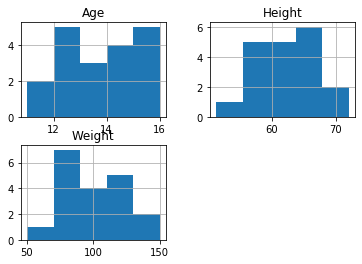

In [186]:
df.hist(bins=5)

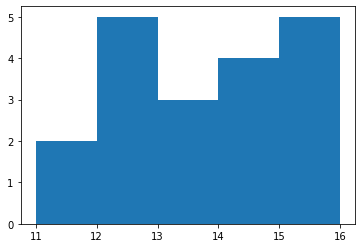

In [185]:
df['Age'].hist(bins=5,grid=False)

[plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

In [190]:
df['Age'].iloc[0:5]

1st    13
2nd    13
3rd    14
4th    12
5th    12
Name: Age, dtype: int64

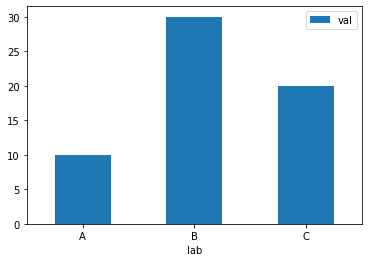

In [203]:
df5 = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [ ]:
name5 = df['Name'].iloc[0:5]
print(name5)

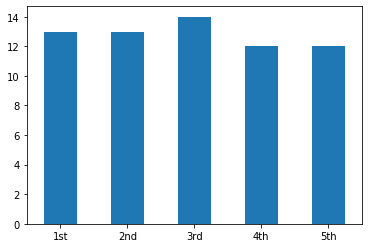

In [211]:
df['Age'].iloc[0:5].plot.bar(rot=0)

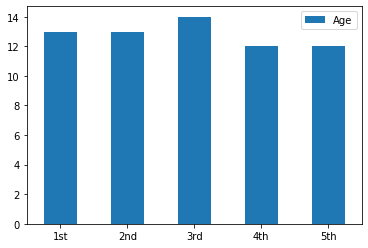

In [217]:
df.iloc[0:5].plot.bar(y='Age',rot=0);

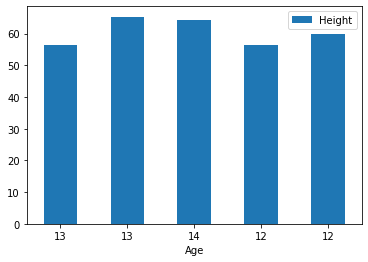

In [218]:
df.iloc[0:5].plot.bar(x='Age',y='Height',rot=0);

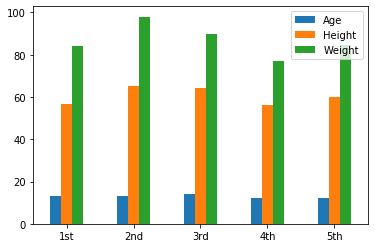

In [212]:
df.iloc[0:5].plot.bar(rot=0)

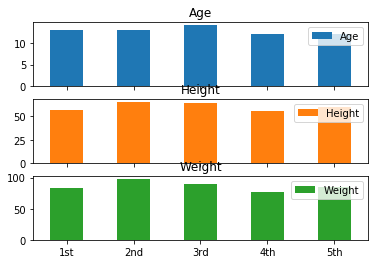

In [216]:
df.iloc[0:5].plot.bar(rot=0, subplots=True);

# Merge
[Return to Contents](#Contents)

`concat`, `merge`

[source](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)  - more details in it


`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)`

In [239]:
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']}) 

right = pd.DataFrame({'key1': ['K1', 'K2', 'K3', 'K4'],
                      'key2': ['K1', 'K1', 'K1', 'K1'],
                       'C': ['C1', 'C2', 'C3', 'C4'],
                       'D': ['D1', 'D2', 'D3', 'D4']})

In [240]:
print(left,'\n\n', right)


  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  B3 

   key1 key2   C   D
0   K1   K1  C1  D1
1   K2   K1  C2  D2
2   K3   K1  C3  D3
3   K4   K1  C4  D4


In [241]:
result1 = pd.merge(left, right, how='inner')
result1

,key1,key2,A,B,C,D
0,K1,K1,A1,B1,C1,D1
1,K3,K1,A3,B3,C3,D3


In [242]:
result2 = pd.merge(left, right, how='outer')
result2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,NaN,NaN
1,K1,K1,A1,B1,C1,D1
2,K2,K0,A2,B2,NaN,NaN
3,K3,K1,A3,B3,C3,D3
4,K2,K1,NaN,NaN,C2,D2
5,K4,K1,NaN,NaN,C4,D4


In [243]:
result3 = pd.merge(left, right, on='key1')
result3

,key1,key2_x,A,B,key2_y,C,D
0,K1,K1,A1,B1,K1,C1,D1
1,K2,K0,A2,B2,K1,C2,D2
2,K3,K1,A3,B3,K1,C3,D3


In [244]:
result4 = pd.merge(left, right, on=['key1','key2'])
result4

,key1,key2,A,B,C,D
0,K1,K1,A1,B1,C1,D1
1,K3,K1,A3,B3,C3,D3


# Misc

[Return to Contents](#Contents)

**if..else in List Comprehension**

In [247]:
aa = [1,2,4,7,5]

bb = [i*aa[i] for i in range(len(aa))]
bb

[0, 2, 8, 21, 20]

In [248]:
cc = [i*aa[i] for i in range(len(aa)) if aa[i]>3]
cc

[8, 21, 20]

In [253]:
dd = [i*aa[i] if aa[i]>3 else aa[i] for i in range(len(aa))]
dd

[1, 2, 8, 21, 20]

In [249]:
value = 123
print(value, 'is', 'even' if value % 2 == 0 else 'odd')

123 is odd


**dictionary**

[Reference](https://www.w3schools.com/python/python_dictionaries.asp)

In [260]:
def function(x):
    return x**2+1

In [261]:
a = {x: function(x) for x in range(3)}
a

{0: 1, 1: 2, 2: 5}

In [278]:
b = {'A':'Alice', 'B':'Bob', 'C':'Cathy'}

In [266]:
b['A']

'Alice'

In [267]:
b.get('A')

'Alice'

In [268]:
b['A'] = 'Andy'
b

{'A': 'Andy', 'B': 'Bob', 'C': 'Cathy'}

In [274]:
len(b)

3

In [270]:
for x in b:
    print(x)

A
B
C


In [271]:
for x in b:
    print(b[x])

Andy
Bob
Cathy


In [272]:
for x in b.values():
    print(x)

Andy
Bob
Cathy


In [273]:
for x,y in b.items():
    print(x,y)

A Andy
B Bob
C Cathy


In [277]:
# b = {'A':'Alice', 'B':'Bob', 'C':'Cathy'}
b.pop('B')
b

{'A': 'Alice', 'C': 'Cathy'}

In [279]:
# b = {'A':'Alice', 'B':'Bob', 'C':'Cathy'}
b.popitem()
b

{'A': 'Alice', 'B': 'Bob'}

In [280]:
# b = {'A':'Alice', 'B':'Bob', 'C':'Cathy'}
bcopy = b.copy()
bcopy

{'A': 'Alice', 'B': 'Bob', 'C': 'Cathy'}

In [281]:
nest_dict = {'a':a, 'b':b}
nest_dict

{'a': {0: 1, 1: 2, 2: 5}, 'b': {'A': 'Alice', 'B': 'Bob', 'C': 'Cathy'}}

In [282]:
nest_dict['a']

{0: 1, 1: 2, 2: 5}